In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_excel('topsis_new.xlsx')
year_list = data['Year'].unique().tolist()
data.set_index(['Country','Year'],inplace=True)
data

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
Country,Year,,,,,
Afghanistan,2000,3.351530e+11,3400,0.144000,33.3288,0.380000
Albania,2000,6.074592e+10,150,0.139200,2485.3140,0.250625
Algeria,2000,2.280440e+11,25000,0.000000,0.0000,0.250625
Angola,2000,1.888670e+11,86000,0.002400,38.2356,0.250625
Antigua and Barbuda,2000,3.318306e+08,45,1.745104,21232.2405,0.250625
...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,4.121390e+11,10000,0.292800,5238.2772,0.219000
Viet Nam,2019,2.753240e+12,96200,0.646800,11547.1512,0.219000
Yemen,2019,1.156550e+11,10000,0.085200,1529.4240,0.219000


In [2]:
data.describe()

,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
count,3.760000e+03,3.760000e+03,3760.000000,3760.000000,3760.000000
mean,1.765368e+12,2.601999e+05,2.139702,21903.633274,0.228225
std,6.234356e+12,1.284697e+06,6.237479,55869.601385,0.148027
min,2.316000e+07,0.000000e+00,0.000000,0.000000,0.000000
25%,2.515166e+10,4.000000e+02,0.028800,267.649200,0.210000
50%,2.237475e+11,6.000000e+03,0.292200,3819.028800,0.223500
75%,9.493882e+11,2.500000e+04,1.901037,21232.240500,0.240125
max,6.223440e+13,1.866000e+07,72.889200,591435.908400,1.490000


In [3]:
for column in data.columns:
    Percentile = np.percentile(data[column],[0,25,50,75,100])
    ageIQR = Percentile[3] - Percentile[1]
    UpLimit = Percentile[3]+ageIQR*1.5
    DownLimit = Percentile[1]-ageIQR*1.5
    data.loc[data[column] > UpLimit,column] = UpLimit
    data.loc[data[column] < DownLimit,column] = DownLimit
data

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
Country,Year,,,,,
Afghanistan,2000,3.351530e+11,3400.0,0.144000,33.3288,0.285313
Albania,2000,6.074592e+10,150.0,0.139200,2485.3140,0.250625
Algeria,2000,2.280440e+11,25000.0,0.000000,0.0000,0.250625
Angola,2000,1.888670e+11,61900.0,0.002400,38.2356,0.250625
Antigua and Barbuda,2000,3.318306e+08,45.0,1.745104,21232.2405,0.250625
...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,4.121390e+11,10000.0,0.292800,5238.2772,0.219000
Viet Nam,2019,2.335743e+12,61900.0,0.646800,11547.1512,0.219000
Yemen,2019,1.156550e+11,10000.0,0.085200,1529.4240,0.219000


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
count,3.760000e+03,3.760000e+03,3760.000000,3760.000000,3760.000000
mean,1.765368e+12,2.601999e+05,2.139702,21903.633274,0.228225
std,6.234356e+12,1.284697e+06,6.237479,55869.601385,0.148027
min,2.316000e+07,0.000000e+00,0.000000,0.000000,0.000000
25%,2.515166e+10,4.000000e+02,0.028800,267.649200,0.210000
50%,2.237475e+11,6.000000e+03,0.292200,3819.028800,0.223500
75%,9.493882e+11,2.500000e+04,1.901037,21232.240500,0.240125
max,6.223440e+13,1.866000e+07,72.889200,591435.908400,1.490000


<AxesSubplot:>

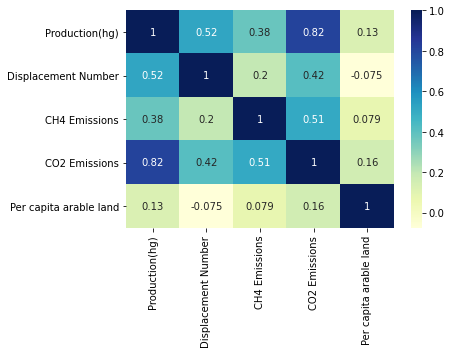

In [2]:
display(data.describe())
sns.heatmap(data.corr(), annot=True,cmap='YlGnBu')

In [5]:
def entropyWeight(data):
    P = np.array(data)
    # 计算熵值
    E = np.nansum(-P * np.log(P) / np.log(len(data)), axis=0)
    # 计算权系数
    return (1 - E) / (1 - E).sum()

In [10]:
# standard
def Max(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

# mid 
def Mid(datas, x_best):
    temp_datas = datas - x_best
    M = np.max(abs(temp_datas))
    answer_datas = 1 - abs(datas - x_best) / M     
    return answer_datas

# standart min
def Min(data):
    _range = np.max(data) - np.min(data)
    return (np.max(data) - data) / _range

# Middle
def Middle(datas, x_min, x_max):
    M = max(x_min - np.min(datas), np.max(datas) - x_max)
    answer_list = []
    for i in datas:
        if(i < x_min):
            answer_list.append(1 - (x_min-i) /M)   
        elif( x_min <= i <= x_max):
            answer_list.append(1)
        else:
            answer_list.append(1 - (i - x_max)/M)
    return np.array(answer_list)

def topsis(data, weight=None):  
    
    # weight
    weight = entropyWeight(data) if weight is None else np.array(weight)
    
    # best
    Z = pd.DataFrame([(data*weight.T).min(), (data*weight.T).max()], index=['负理想解', '正理想解'])
    #Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])
    

    Result = data.copy()
    Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
    Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))
#     Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 ).sum(axis=1))
#     Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 ).sum(axis=1))

    # Score
    Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
    Result['排序'] = Result.rank(ascending=False)['综合得分指数']

    return Result, Z, weight


In [11]:
weights = pd.DataFrame()
all_data = pd.DataFrame()
for year in year_list:
    one_year_data = data.reset_index()
    one_year_data = one_year_data[one_year_data['Year']==year]
    one_year_data = one_year_data.set_index(['Country','Year'])
    display(one_year_data.columns)
    # Standard
    one_year_data['Production(hg)'] = Max(
        one_year_data['Production(hg)'])
    
    one_year_data['Displacement Number'] = Min(
        one_year_data['Displacement Number'])
    
    one_year_data['CH4 Emissions'] = Min(
        one_year_data['CH4 Emissions'])
    
    one_year_data['CO2 Emissions'] = Min(
        one_year_data['CO2 Emissions'])
    
    one_year_data['Per capita arable land'] = Max(
        one_year_data['Per capita arable land'])
    
    # TOPSIS
#     weight = [0.25,0.25,0.25,0.25]
    one_year_data ,z,weight= topsis(one_year_data
#                                     ,weight=weight
                                   )
    
    
    display(one_year_data)
    display(z)
    print('Weight:',weight)
    weight = pd.DataFrame(weight).T
    weight.index = [year]
    weights = pd.concat([weights,weight],axis=0)
    all_data = pd.concat([all_data,one_year_data],axis=0)
all_data['Score'] = all_data['综合得分指数']
all_data['Rank'] = all_data['排序']
all_data.drop(['正理想解','负理想解','综合得分指数','排序'],axis=1,inplace=True)
weights.columns = data.columns
all_data

Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2000,0.143478,0.945073,0.969423,0.999367,1.000000,0.652154,0.833655,0.561078,100.0
Albania,2000,0.025995,0.997577,0.970442,0.952822,0.712137,0.579195,0.724581,0.555756,125.0
Algeria,2000,0.097621,0.596123,1.000000,1.000000,0.712137,0.552833,0.712643,0.563142,93.0
Angola,2000,0.080848,0.000000,0.999490,0.999274,0.712137,0.537067,0.694259,0.563830,91.0
Antigua and Barbuda,2000,0.000129,0.999273,0.629442,0.596952,0.712137,0.447571,0.591058,0.569075,75.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2000,0.189225,0.903069,0.976303,0.962257,0.712137,0.556732,0.726459,0.566135,84.0
Viet Nam,2000,0.716972,0.000000,0.890941,0.825803,0.712137,0.507631,0.739316,0.592901,11.0
Yemen,2000,0.049547,0.903069,0.806854,0.691526,0.712137,0.475417,0.629346,0.569666,69.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.294576,0.069174,0.147769,0.172408,0.316073


Weight: [0.29457568 0.06917415 0.1477693  0.17240827 0.3160726 ]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2001,0.129997,0.945073,0.969423,0.999263,1.000000,0.647885,0.841552,0.565014,101.0
Albania,2001,0.024788,0.997577,0.969423,0.951370,0.665456,0.559235,0.710351,0.559514,121.0
Algeria,2001,0.170197,0.596123,1.000000,1.000000,0.665456,0.529113,0.703785,0.570838,84.0
Angola,2001,0.097424,0.000000,0.999490,0.999274,0.665456,0.517157,0.682754,0.569004,91.0
Antigua and Barbuda,2001,0.000130,0.999273,0.619814,0.592545,0.665456,0.421972,0.575369,0.576903,67.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2001,0.196045,0.903069,0.968658,0.949918,0.665456,0.533715,0.709050,0.570542,87.0
Viet Nam,2001,0.733331,0.000000,0.886355,0.818545,0.665456,0.494273,0.726729,0.595191,16.0
Yemen,2001,0.053250,0.903069,0.784940,0.656687,0.665456,0.442390,0.605580,0.577860,58.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.280627,0.065578,0.143636,0.169302,0.340857


Weight: [0.28062675 0.06557788 0.14363635 0.1693024  0.34085662]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2002,0.137651,0.945073,0.954134,0.998827,1.000000,0.640597,0.839759,0.567268,97.0
Albania,2002,0.024205,0.997577,0.969423,0.951370,0.650934,0.551554,0.702301,0.560114,123.0
Algeria,2002,0.157625,0.596123,1.000000,1.000000,0.650934,0.521173,0.694097,0.571146,87.0
Angola,2002,0.109573,0.000000,0.998981,0.998548,0.650934,0.506712,0.673911,0.570810,89.0
Antigua and Barbuda,2002,0.000138,0.999273,0.634752,0.627379,0.650934,0.424123,0.578847,0.577133,70.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2002,0.175365,0.903069,0.977322,0.963709,0.650934,0.532014,0.704166,0.569630,91.0
Viet Nam,2002,0.785448,0.000000,0.870302,0.793141,0.650934,0.492965,0.728454,0.596400,15.0
Yemen,2002,0.050044,0.903069,0.747229,0.596444,0.650934,0.418288,0.583364,0.582402,42.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.00000,0.000000,0.00000,0.000000,0.000000
正理想解,0.27977,0.065485,0.14471,0.157439,0.352596


Weight: [0.27976974 0.06548543 0.14471016 0.15743873 0.35259593]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2003,0.173006,0.945073,0.954134,0.998752,1.00000,0.633835,0.844912,0.571370,95.0
Albania,2003,0.023794,0.997577,0.993630,0.989839,0.62500,0.553556,0.704070,0.559840,130.0
Algeria,2003,0.237263,0.596123,1.000000,1.000000,0.62500,0.505748,0.688975,0.576682,77.0
Angola,2003,0.123798,0.000000,0.998216,0.997097,0.62500,0.492472,0.662688,0.573676,88.0
Antigua and Barbuda,2003,0.000144,0.999273,0.624429,0.620827,0.62500,0.409260,0.567074,0.580819,64.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2003,0.193774,0.903069,0.977067,0.963273,0.62500,0.519157,0.694110,0.572100,91.0
Viet Nam,2003,0.830290,0.000000,0.861893,0.779351,0.62500,0.491856,0.727741,0.596706,16.0
Yemen,2003,0.047339,0.903069,0.718435,0.550717,0.62500,0.393058,0.561367,0.588173,32.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.274713,0.064414,0.137973,0.154421,0.368479


Weight: [0.27471269 0.06441365 0.13797339 0.15442101 0.36847926]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2004,0.158497,0.945073,0.938846,0.998150,1.000000,0.634717,0.845049,0.571069,95.0
Albania,2004,0.024947,0.997577,0.969168,0.950644,0.618776,0.540730,0.694460,0.562229,123.0
Algeria,2004,0.262143,0.596123,1.000000,1.000000,0.618776,0.509846,0.696206,0.577261,75.0
Angola,2004,0.147953,0.000000,0.998981,0.998548,0.618776,0.495579,0.670150,0.574876,85.0
Antigua and Barbuda,2004,0.000147,0.999273,0.596331,0.590804,0.618776,0.396246,0.556162,0.583953,61.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2004,0.211302,0.903069,0.961269,0.938305,0.618776,0.511716,0.690571,0.574381,87.0
Viet Nam,2004,0.861921,0.000000,0.844821,0.752495,0.618776,0.495110,0.729638,0.595745,19.0
Yemen,2004,0.050299,0.903069,0.686584,0.499910,0.618776,0.375885,0.546772,0.592606,23.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.268451,0.062671,0.142454,0.161998,0.364426


Weight: [0.26845096 0.06267095 0.14245386 0.16199839 0.36442585]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2005,0.172151,0.945073,0.938846,0.998129,1.000000,0.635863,0.849734,0.571981,97.0
Albania,2005,0.024001,0.997577,0.970952,0.953547,0.606328,0.541096,0.696677,0.562847,124.0
Algeria,2005,0.218219,0.596123,1.000000,1.000000,0.606328,0.512201,0.694366,0.575489,83.0
Angola,2005,0.155668,0.000000,0.998981,0.998548,0.606328,0.496878,0.673529,0.575466,84.0
Antigua and Barbuda,2005,0.000130,0.999273,0.528180,0.567063,0.606328,0.375128,0.537859,0.589120,48.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2005,0.220604,0.903069,0.903682,0.846102,0.606328,0.475989,0.660581,0.581205,68.0
Viet Nam,2005,0.884646,0.000000,0.832590,0.732898,0.606328,0.496148,0.728179,0.594758,23.0
Yemen,2005,0.055721,0.903069,0.672569,0.477409,0.606328,0.364192,0.538380,0.596495,21.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.260667,0.060851,0.150956,0.163219,0.364307


Weight: [0.26066686 0.06085121 0.15095573 0.16321931 0.3643069 ]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2006,0.168117,0.945073,0.816537,0.995122,0.70695,0.510488,0.712481,0.582583,64.0
Albania,2006,0.028530,0.997577,0.943687,0.909998,0.49222,0.497692,0.642428,0.563474,113.0
Algeria,2006,0.354625,0.596123,1.000000,1.000000,0.49222,0.491259,0.670625,0.577188,81.0
Angola,2006,0.157782,0.000000,0.998216,0.997097,0.49222,0.471874,0.635070,0.573714,92.0
Antigua and Barbuda,2006,0.000134,0.999273,0.517410,0.539000,0.49222,0.334891,0.487123,0.592597,44.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2006,0.222574,0.903069,0.979615,0.967338,0.49222,0.499291,0.664344,0.570921,99.0
Viet Nam,2006,0.911996,0.000000,0.836412,0.738705,0.49222,0.485584,0.698230,0.589814,47.0
Yemen,2006,0.064535,0.903069,0.650401,0.441844,0.49222,0.320287,0.485672,0.602601,17.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.00000,0.000000,0.000000
正理想解,0.245131,0.057043,0.14716,0.155815,0.394851


Weight: [0.24513084 0.05704322 0.14715988 0.15581468 0.39485138]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2007,0.173820,0.945073,0.694228,0.992554,0.706950,0.488324,0.695022,0.587336,51.0
Albania,2007,0.025418,0.997577,0.970442,0.952822,0.474585,0.514613,0.656716,0.560659,120.0
Algeria,2007,0.243636,0.596123,1.000000,1.000000,0.474585,0.490093,0.657960,0.573110,94.0
Angola,2007,0.203341,0.000000,0.998216,0.997097,0.474585,0.472346,0.638150,0.574653,89.0
Antigua and Barbuda,2007,0.000139,0.999273,0.537610,0.580180,0.474585,0.341878,0.491762,0.589897,45.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007,0.228569,0.903069,0.937826,0.900563,0.474585,0.473019,0.639402,0.574784,87.0
Viet Nam,2007,0.939546,0.000000,0.834119,0.735075,0.474585,0.493441,0.701115,0.586925,52.0
Yemen,2007,0.075320,0.903069,0.608612,0.375068,0.474585,0.297265,0.463091,0.609045,10.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.239688,0.056005,0.152336,0.157627,0.394344


Weight: [0.23968793 0.05600523 0.15233642 0.15762687 0.39434355]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2008,0.159262,0.945073,0.694228,0.992923,0.623963,0.472548,0.663228,0.583942,56.0
Albania,2008,0.030503,0.997577,0.975538,0.960835,0.475622,0.519039,0.661443,0.560316,120.0
Algeria,2008,0.171378,0.596123,1.000000,1.000000,0.475622,0.492620,0.653918,0.570342,100.0
Angola,2008,0.160760,0.000000,0.997197,0.995645,0.475622,0.474152,0.635865,0.572842,95.0
Antigua and Barbuda,2008,0.000141,0.999273,0.528745,0.565598,0.475622,0.339223,0.488675,0.590260,45.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2008,0.238911,0.903069,0.937826,0.900563,0.475622,0.474470,0.641788,0.574946,85.0
Viet Nam,2008,0.999588,0.000000,0.833099,0.733624,0.475622,0.514527,0.721292,0.583655,58.0
Yemen,2008,0.061551,0.903069,0.577016,0.324987,0.475622,0.288156,0.450768,0.610033,8.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.240456,0.056832,0.152153,0.159802,0.390758


Weight: [0.2404556  0.05683212 0.15215258 0.15980207 0.39075762]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2009,0.226502,0.000000,0.694228,0.992811,0.540975,0.404754,0.600473,0.597351,38.0
Albania,2009,0.031757,0.997577,0.971716,0.954999,0.475622,0.503876,0.648441,0.562728,116.0
Algeria,2009,0.310152,0.959612,0.987769,0.980403,0.475622,0.500919,0.673884,0.573615,98.0
Angola,2009,0.226225,0.000000,0.996942,0.994919,0.475622,0.473471,0.644470,0.576479,89.0
Antigua and Barbuda,2009,0.000143,1.000000,0.510546,0.589223,0.475622,0.319496,0.472925,0.596810,43.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2009,0.237981,0.903069,0.937826,0.900563,0.475622,0.462395,0.633566,0.578092,83.0
Viet Nam,2009,0.976571,0.000000,0.830806,0.729995,0.475622,0.507376,0.721512,0.587126,61.0
Yemen,2009,0.057969,0.903069,0.868518,0.790238,0.475622,0.427442,0.582199,0.576639,88.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.00000
正理想解,0.249507,0.037943,0.157318,0.157942,0.39729


Weight: [0.24950675 0.0379433  0.15731802 0.15794169 0.39729024]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2010,0.187235,0.000000,0.694228,0.992830,0.872925,0.499021,0.738306,0.596694,42.0
Albania,2010,0.030097,1.000000,0.973500,0.957902,0.494295,0.510860,0.660595,0.563910,120.0
Algeria,2010,0.299385,1.000000,0.989553,0.983306,0.494295,0.511148,0.686383,0.573165,99.0
Angola,2010,0.232255,0.000000,0.996433,0.994193,0.494295,0.477137,0.653461,0.577979,84.0
Antigua and Barbuda,2010,0.000145,1.000000,0.528458,0.576144,0.494295,0.325435,0.485085,0.598486,38.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2010,0.227439,0.903069,0.937826,0.900563,0.494295,0.468199,0.642755,0.578561,81.0
Viet Nam,2010,1.000000,0.000000,0.831825,0.731446,0.494295,0.517711,0.732998,0.586066,62.0
Yemen,2010,0.074190,0.903069,0.886355,0.818545,0.494295,0.442035,0.603340,0.577152,87.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.244866,0.041036,0.157562,0.163133,0.393403


Weight: [0.24486643 0.04103596 0.15756224 0.1631328  0.39340257]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2011,0.174546,0.000000,0.694228,0.992824,0.457988,0.395947,0.561795,0.586583,50.0
Albania,2011,0.033010,1.000000,0.966875,0.947015,0.487033,0.519974,0.664677,0.561074,117.0
Algeria,2011,0.313914,1.000000,0.988534,0.981854,0.487033,0.525682,0.694042,0.569016,99.0
Angola,2011,0.273456,0.000000,0.995923,0.993468,0.487033,0.471469,0.644304,0.577451,75.0
Antigua and Barbuda,2011,0.000146,0.977383,0.527571,0.570122,0.487033,0.346984,0.499155,0.589921,39.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2011,0.237291,0.903069,0.937826,0.900563,0.487033,0.480652,0.648611,0.574367,86.0
Viet Nam,2011,1.000000,0.000000,0.835902,0.737979,0.487033,0.515648,0.720900,0.582994,57.0
Yemen,2011,0.063990,0.903069,0.906230,0.850481,0.487033,0.468338,0.621163,0.570135,96.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.235791,0.066772,0.153344,0.155166,0.388927


Weight: [0.23579058 0.06677193 0.15334433 0.15516586 0.3889273 ]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2012,0.191511,0.000000,0.694228,0.992819,0.789938,0.462620,0.686495,0.597412,19.0
Albania,2012,0.036019,1.000000,0.970697,0.953185,0.487033,0.525825,0.669015,0.559920,120.0
Algeria,2012,0.369345,1.000000,0.991336,0.986209,0.487033,0.533856,0.703357,0.568501,97.0
Angola,2012,0.171695,0.896607,0.995923,0.993468,0.487033,0.520088,0.676753,0.565449,106.0
Antigua and Barbuda,2012,0.000136,0.977383,0.530318,0.581167,0.487033,0.359160,0.509484,0.586528,48.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2012,0.204314,0.903069,0.937826,0.900563,0.487033,0.484016,0.647026,0.572062,87.0
Viet Nam,2012,1.000000,0.757674,0.844566,0.751769,0.487033,0.550724,0.749351,0.576391,71.0
Yemen,2012,0.068639,0.903069,0.928144,0.885320,0.487033,0.484483,0.635010,0.567230,100.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.233087,0.078036,0.149512,0.149587,0.389779


Weight: [0.23308683 0.0780356  0.14951232 0.14958668 0.38977858]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2013,0.199633,0.000000,0.694228,0.992171,0.706950,0.440844,0.659113,0.599217,27.0
Albania,2013,0.034811,0.992730,0.968149,0.949338,0.502593,0.520645,0.670920,0.563058,116.0
Algeria,2013,0.370438,0.994507,0.991336,0.986209,0.502593,0.531175,0.707155,0.571056,95.0
Angola,2013,0.266762,0.959612,0.994649,0.991290,0.502593,0.525310,0.694899,0.569492,100.0
Antigua and Barbuda,2013,0.000134,0.977383,0.508385,0.554620,0.502593,0.340854,0.500144,0.594703,35.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2013,0.207033,0.903069,0.937826,0.900563,0.502593,0.482272,0.652253,0.574913,80.0
Viet Nam,2013,1.000000,0.000000,0.854504,0.767737,0.502593,0.525188,0.731508,0.582089,66.0
Yemen,2013,0.066523,0.903069,0.863931,0.782980,0.502593,0.443159,0.604035,0.576813,76.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.231302,0.065986,0.152784,0.158339,0.391589


Weight: [0.23130191 0.06598603 0.15278358 0.15833899 0.39158949]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2014,0.205898,0.000000,0.663651,0.991388,0.706950,0.434870,0.653729,0.600523,17.0
Albania,2014,0.035868,0.999612,0.966620,0.946805,0.492220,0.520506,0.667880,0.562006,117.0
Algeria,2014,0.381003,0.927302,0.990827,0.985484,0.492220,0.523735,0.699148,0.571721,93.0
Angola,2014,0.256618,0.909532,0.994649,0.991290,0.492220,0.519326,0.686416,0.569289,98.0
Antigua and Barbuda,2014,0.000133,0.977383,0.499225,0.550246,0.492220,0.340033,0.495650,0.593108,41.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2014,0.203484,0.903069,0.937826,0.900563,0.492220,0.482080,0.648829,0.573723,87.0
Viet Nam,2014,1.000000,0.000000,0.859090,0.774996,0.492220,0.526119,0.729688,0.581051,66.0
Yemen,2014,0.059509,0.903069,0.865460,0.785157,0.492220,0.444615,0.601453,0.574966,81.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.231558,0.068513,0.150175,0.158669,0.391085


Weight: [0.23155799 0.06851307 0.15017489 0.15866864 0.39108541]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2015,0.152153,0.000000,0.661103,0.991325,0.540975,0.397329,0.586405,0.596101,35.0
Albania,2015,0.037613,0.932149,0.966875,0.947015,0.466286,0.502912,0.648248,0.563126,114.0
Algeria,2015,0.401305,0.693053,0.990062,0.984032,0.466286,0.495108,0.672421,0.575935,79.0
Angola,2015,0.260597,0.909532,0.995413,0.992742,0.466286,0.511005,0.674848,0.569083,96.0
Antigua and Barbuda,2015,0.000135,0.977383,0.512980,0.586587,0.466286,0.334771,0.487427,0.592834,42.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2015,0.179535,0.903069,0.937826,0.900563,0.466286,0.473144,0.634338,0.572775,86.0
Viet Nam,2015,1.000000,0.844911,0.868008,0.789512,0.466286,0.560624,0.755390,0.573999,82.0
Yemen,2015,0.050722,0.903069,0.977322,0.963709,0.466286,0.505598,0.652240,0.563326,113.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.230036,0.058784,0.149143,0.157779,0.404258


Weight: [0.23003641 0.05878353 0.14914304 0.15777894 0.40425807]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2016,0.147146,0.000000,0.674863,0.991678,0.457988,0.389998,0.554976,0.587292,47.0
Albania,2016,0.041171,0.949919,0.965855,0.945563,0.449689,0.504435,0.643754,0.560669,115.0
Algeria,2016,0.467944,0.882068,0.992611,0.988387,0.449689,0.518534,0.690624,0.571161,87.0
Angola,2016,0.307552,0.693053,0.995923,0.993468,0.449689,0.491633,0.656872,0.571937,83.0
Antigua and Barbuda,2016,0.000136,0.977383,0.520100,0.598403,0.449689,0.343376,0.488145,0.587051,48.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2016,0.167640,0.903069,0.937826,0.900563,0.449689,0.473895,0.627934,0.569901,89.0
Viet Nam,2016,1.000000,0.000000,0.847114,0.756124,0.449689,0.514999,0.710923,0.579909,65.0
Yemen,2016,0.046385,0.903069,0.984457,0.975322,0.449689,0.510567,0.650394,0.560221,116.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.230915,0.064734,0.145489,0.154477,0.404384


Weight: [0.230915   0.0647342  0.14548933 0.15447715 0.40438432]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2017,0.157874,0.000000,0.665180,0.991427,0.457988,0.390524,0.560087,0.589186,52.0
Albania,2017,0.042968,0.943457,0.961524,0.938781,0.449689,0.497453,0.640192,0.562735,114.0
Algeria,2017,0.493075,1.000000,0.993120,0.989113,0.449689,0.531141,0.704132,0.570021,92.0
Angola,2017,0.311769,0.773829,0.997197,0.995645,0.449689,0.499135,0.665543,0.571439,86.0
Antigua and Barbuda,2017,0.000136,0.977383,0.519287,0.598774,0.449689,0.334519,0.483426,0.591025,43.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2017,0.166839,0.903069,0.937826,0.900563,0.449689,0.470763,0.627455,0.571340,87.0
Viet Nam,2017,1.000000,0.000000,0.862657,0.780802,0.449689,0.523048,0.719354,0.579002,76.0
Yemen,2017,0.044782,0.903069,0.981908,0.970967,0.449689,0.506412,0.649072,0.561732,116.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.228498,0.056774,0.145791,0.160583,0.408353


Weight: [0.22849784 0.05677449 0.14579129 0.16058309 0.4083533 ]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2018,0.132196,0.000000,0.648362,0.990996,0.457988,0.385691,0.546485,0.586247,43.0
Albania,2018,0.043853,0.998223,0.961524,0.938781,0.449689,0.519414,0.657922,0.558823,118.0
Algeria,2018,0.514675,0.999693,0.992611,0.988387,0.449689,0.549249,0.717679,0.566472,96.0
Angola,2018,0.313948,0.822294,0.997197,0.995645,0.449689,0.512307,0.673708,0.568043,90.0
Antigua and Barbuda,2018,0.000136,0.977383,0.519730,0.599250,0.449689,0.362079,0.505587,0.582698,46.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2018,0.170734,0.838449,0.937826,0.900563,0.449689,0.475411,0.629710,0.569811,88.0
Viet Nam,2018,1.000000,0.000000,0.862657,0.780802,0.449689,0.520067,0.708611,0.576726,69.0
Yemen,2018,0.043389,0.838449,0.981908,0.970967,0.449689,0.509716,0.650272,0.560585,111.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.222623,0.085625,0.140815,0.155376,0.395562


Weight: [0.22262278 0.08562472 0.14081482 0.15537603 0.39556165]


Index(['Production(hg)', 'Displacement Number', 'CH4 Emissions',
       'CO2 Emissions', 'Per capita arable land'],
      dtype='object')

,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,正理想解,负理想解,综合得分指数,排序
Country,Year,,,,,,,,,
Afghanistan,2019,0.187206,0.000000,0.648362,0.990996,0.457988,0.384773,0.554359,0.590289,39.0
Albania,2019,0.043001,0.000000,0.961524,0.938781,0.449689,0.448396,0.594084,0.569875,86.0
Algeria,2019,0.514829,0.948304,0.992611,0.988387,0.449689,0.534629,0.706798,0.569343,87.0
Angola,2019,0.315471,0.873990,0.997197,0.995645,0.449689,0.512910,0.675284,0.568328,92.0
Antigua and Barbuda,2019,0.000137,0.977383,0.519730,0.599250,0.449689,0.348411,0.493403,0.586119,49.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.176441,0.838449,0.937826,0.900563,0.449689,0.469335,0.625549,0.571338,85.0
Viet Nam,2019,1.000000,0.000000,0.862657,0.780802,0.449689,0.521844,0.715043,0.578099,72.0
Yemen,2019,0.049506,0.838449,0.981908,0.970967,0.449689,0.504448,0.646284,0.561628,113.0


,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
负理想解,0.000000,0.000000,0.000000,0.000000,0.000000
正理想解,0.227429,0.070051,0.143007,0.157795,0.401719


Weight: [0.22742894 0.07005093 0.1430067  0.15779457 0.40171886]


,,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land,Score,Rank
Country,Year,,,,,,,
Afghanistan,2000,0.143478,0.945073,0.969423,0.999367,1.000000,0.561078,100.0
Albania,2000,0.025995,0.997577,0.970442,0.952822,0.712137,0.555756,125.0
Algeria,2000,0.097621,0.596123,1.000000,1.000000,0.712137,0.563142,93.0
Angola,2000,0.080848,0.000000,0.999490,0.999274,0.712137,0.563830,91.0
Antigua and Barbuda,2000,0.000129,0.999273,0.629442,0.596952,0.712137,0.569075,75.0
...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,0.176441,0.838449,0.937826,0.900563,0.449689,0.571338,85.0
Viet Nam,2019,1.000000,0.000000,0.862657,0.780802,0.449689,0.578099,72.0
Yemen,2019,0.049506,0.838449,0.981908,0.970967,0.449689,0.561628,113.0


In [12]:
weights

,Production(hg),Displacement Number,CH4 Emissions,CO2 Emissions,Per capita arable land
2000,0.294576,0.069174,0.147769,0.172408,0.316073
2001,0.280627,0.065578,0.143636,0.169302,0.340857
2002,0.279770,0.065485,0.144710,0.157439,0.352596
2003,0.274713,0.064414,0.137973,0.154421,0.368479
2004,0.268451,0.062671,0.142454,0.161998,0.364426
2005,0.260667,0.060851,0.150956,0.163219,0.364307
2006,0.245131,0.057043,0.147160,0.155815,0.394851
2007,0.239688,0.056005,0.152336,0.157627,0.394344
2008,0.240456,0.056832,0.152153,0.159802,0.390758
2009,0.249507,0.037943,0.157318,0.157942,0.397290


In [13]:
weights.to_csv('weight.csv')
all_data.to_csv('topsis_original.csv')